In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
data_path = ".\data"
channels = pd.read_csv(data_path + '\df_channels.tsv', sep='\t')

Loading data...


# Data Cleaning

In [3]:
cleaned_channels = channels.copy()

In [4]:
cleaned_channels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156977 entries, 0 to 156976
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   category_cc         156846 non-null  object 
 1   join_date           156976 non-null  object 
 2   channel             156977 non-null  object 
 3   name_cc             156965 non-null  object 
 4   subscribers_cc      156977 non-null  int64  
 5   videos_cc           156977 non-null  int64  
 6   subscriber_rank_sb  153330 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.4+ MB


#### join_date

In [6]:
cleaned_channels[cleaned_channels['join_date'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
33540,Entertainment,NaN,UCBR8-60-B28hp2BmDPdntcQ,YouTube,28200000,301,110.0


In [7]:
cleaned_channels.drop(33540, inplace=True)

In [8]:
cleaned_channels[cleaned_channels['join_date'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb


#### name_cc

In [10]:
cleaned_channels[cleaned_channels['name_cc'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
8231,Entertainment,2014-01-01,UCMzbrcOG-edOxonhLbsOD4Q,NaN,112543,118,140756.0
8232,Gaming,2015-02-01,UCJIYgIBaQt0YcGO73VCLPyg,NaN,57000,180,266879.0
8233,Entertainment,2007-03-27,UCp5Tpg0lLGtsG88CvUKey_A,NaN,12400,362,789457.0
8234,Entertainment,2016-07-09,UCmOiT9ZnSvLZ1XMBFjGiNmQ,NaN,55100,26,249430.0
8235,Film and Animation,2016-09-27,UChiZ8VX_WjTGvhpxHub16_A,NaN,31600,55,349306.0
8236,Entertainment,2009-03-12,UCgtijEzltp6pTR6ezYCwUQQ,NaN,16500,59,662889.0
8237,Gaming,2016-05-26,UCv_OpX7RULreDQOhZlVLuUw,NaN,11000,108,929597.0
8238,Music,2011-12-31,UCA67sOj4L0qlqOHQZsmUhVw,NaN,15200,68,736183.0
8239,Entertainment,2007-12-04,UCYj8nTwafpwx0T8wKkWuwag,NaN,42000,10,338910.0
8240,Music,2011-08-26,UCq-68gzHO5ulmrZ2tW-jyTg,NaN,19800,390,535474.0


In [11]:
cleaned_channels['name_cc'].fillna('unknown name', inplace=True)

In [12]:
cleaned_channels[cleaned_channels['name_cc'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb


#### category_cc

In [14]:
cleaned_channels[cleaned_channels['category_cc'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
3100,NaN,2011-11-10,UCUC0f5Lu42bIi9IClnYP4zw,PixarMoviesOnDemand,138000,16,126929.0
5002,NaN,2006-04-08,UCJdx55eTMBJI9dwuP65xcSg,nevake,28600,9168,444224.0
5113,NaN,2016-07-24,UCfL3FVHRncVVoBnVI_EI8vw,spoiled milk,10600,33,938514.0
5143,NaN,2014-02-17,UCDhrs5GhG2t1Ov3oya3K4tg,TwitchPlaysPokemon,10300,342,977938.0
5638,NaN,2007-05-29,UCBgt-JTMivpgj-sHaea6M-Q,New Music,22800,398,507809.0
...,...,...,...,...,...,...,...
146651,NaN,2013-04-09,UC-jhZdJL4gDmATXCqMkM7pA,EtherealExposition,16435,63,631214.0
149433,NaN,2006-05-12,UCVEfyEuLJpgw_y4jSgV8Rtg,lonelygirl15,173903,396,100037.0
150554,NaN,2011-06-14,UC_3JbOmL48TMal015yX13Iw,FyreUK [ARCHIVE],303000,466,60223.0
151278,NaN,2008-11-17,UCEPE1gwLMgNmTFQSSfXAIcg,Danielle Lowe,36300,78,346694.0


In [15]:
print(f'the channels with unknown category represent : {13100/len(channels)}%')

the channels with unknown category represent : 0.08345171585646305%


The **channels with unknown category** represent **less than 0.01%** of the total data, we can drop them.

In [17]:
cleaned_channels = cleaned_channels[cleaned_channels['category_cc'].notna()]

In [18]:
cleaned_channels[cleaned_channels['category_cc'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb


#### subscriber_rank_sb

In [20]:
cleaned_channels.sort_values(by = 'subscribers_cc', ascending=False)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
29058,Music,2006-03-13,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,112139463,13839,102.0
16032,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0
43231,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0
35502,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0
40878,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0
...,...,...,...,...,...,...,...
80084,Music,2017-07-27,UCbKqo5ccPuQad_17MoSxpvw,Ayanami,10000,20,876195.0
152522,Entertainment,2014-05-02,UC-AKZXBB30O4ZM5zVLGUPCg,ArabianRider,10000,212,977030.0
118797,Music,2011-08-27,UCVXWrVUv_Pbt24btuuIDvqw,Densle,10000,60,944207.0
13068,Music,2016-04-30,UCu4TumUmUdU_YmbSuvEOvNg,Trailer Music Empire...,10000,157,812348.0


The 'subscriber_rank_sb' feature is incorrect, as we can se it above.

In [22]:
cleaned_channels['subscriber_rank_sb'] = cleaned_channels['subscribers_cc'].rank(ascending=False, method='dense')

In [23]:
cleaned_channels.sort_values(by = 'subscribers_cc', ascending=False)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
29058,Music,2006-03-13,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,112139463,13839,1.0
16032,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,2.0
43231,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,3.0
35502,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,4.0
40878,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,5.0
...,...,...,...,...,...,...,...
80084,Music,2017-07-27,UCbKqo5ccPuQad_17MoSxpvw,Ayanami,10000,20,31237.0
152522,Entertainment,2014-05-02,UC-AKZXBB30O4ZM5zVLGUPCg,ArabianRider,10000,212,31237.0
118797,Music,2011-08-27,UCVXWrVUv_Pbt24btuuIDvqw,Densle,10000,60,31237.0
13068,Music,2016-04-30,UCu4TumUmUdU_YmbSuvEOvNg,Trailer Music Empire...,10000,157,31237.0


The problem is fixed

In [25]:
cleaned_channels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156845 entries, 0 to 156976
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   category_cc         156845 non-null  object 
 1   join_date           156845 non-null  object 
 2   channel             156845 non-null  object 
 3   name_cc             156845 non-null  object 
 4   subscribers_cc      156845 non-null  int64  
 5   videos_cc           156845 non-null  int64  
 6   subscriber_rank_sb  156845 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 9.6+ MB


#### Type conversion

In [27]:
cleaned_channels['subscriber_rank_sb'] = cleaned_channels['subscriber_rank_sb'].astype('int64')

In [28]:
cleaned_channels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156845 entries, 0 to 156976
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   category_cc         156845 non-null  object
 1   join_date           156845 non-null  object
 2   channel             156845 non-null  object
 3   name_cc             156845 non-null  object
 4   subscribers_cc      156845 non-null  int64 
 5   videos_cc           156845 non-null  int64 
 6   subscriber_rank_sb  156845 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.6+ MB


#### Feature creation

In [30]:
datetime_column = pd.to_datetime(cleaned_channels['join_date'])
cleaned_channels['year'] = datetime_column.dt.year
cleaned_channels['month'] = datetime_column.dt.month
cleaned_channels['day'] = datetime_column.dt.day

In [31]:
cleaned_channels.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,year,month,day
0,Film and Animation,2017-05-21,UCBJuEqXfXTdcPSbGO9qqn1g,MagnusNation,65100,28,15856,2017,5,21
1,Entertainment,2011-12-13,UCkNW9Q1VR_aeZ6uht83jJVQ,Mago Dario Animazion...,60200,48,16388,2011,12,13
2,Music,2008-03-17,UCXhkGgooXHDNwgJXmoTSN7g,Mago Merlino,14800,838,27869,2008,3,17
3,Entertainment,2014-10-19,UCvZGsuvKlYOGiZTsxwJNS5Q,MAGO TOMÁS,26200,31,22950,2014,10,19
4,Comedy,2017-01-15,UCxJWPpPED-J24znoKyKZYjg,Magog of Morskar,29400,158,21938,2017,1,15


## Full cleaning pipeline

In [33]:

def cleaning_pipeline(data):

    cleaned_data = data.copy()
    
    # delete the line with joint_data = NaN
    cleaned_data.drop(33540, inplace = True)

    # remplace name_cc that are NaN by 'unknown name'
    cleaned_data['name_cc'].fillna('unknown name', inplace=True)

    # drop channels with unknown category
    cleaned_data = cleaned_data[cleaned_data['category_cc'].notna()]

    # recreate the subscriber_rank_sb
    cleaned_data['subscriber_rank_sb'] = cleaned_data['subscribers_cc'].rank(ascending=False, method='dense')

    # subscriber_rank_sb type conversion
    cleaned_data['subscriber_rank_sb'] = cleaned_data['subscriber_rank_sb'].astype('int64')

    # date feature creation
    datetime_column = pd.to_datetime(cleaned_data['join_date'])
    cleaned_data['year'] = datetime_column.dt.year
    cleaned_data['month'] = datetime_column.dt.month
    cleaned_data['day'] = datetime_column.dt.day

    return cleaned_data
    

In [34]:
clean_data = cleaning_pipeline(channels)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156845 entries, 0 to 156976
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   category_cc         156845 non-null  object
 1   join_date           156845 non-null  object
 2   channel             156845 non-null  object
 3   name_cc             156845 non-null  object
 4   subscribers_cc      156845 non-null  int64 
 5   videos_cc           156845 non-null  int64 
 6   subscriber_rank_sb  156845 non-null  int64 
 7   year                156845 non-null  int32 
 8   month               156845 non-null  int32 
 9   day                 156845 non-null  int32 
dtypes: int32(3), int64(3), object(4)
memory usage: 11.4+ MB


# Data Exploration

In [36]:
channels = clean_data.copy()

the data set channels contains all channels with **>10k subscribers** and **>10 videos**

In [38]:
def get_unique_values(data, feature):
    return data[feature].unique().tolist()

In [39]:
categories_list = get_unique_values(channels, 'category_cc')
categories_list

['Film and Animation',
 'Entertainment',
 'Music',
 'Comedy',
 'Gaming',
 'Science & Technology',
 'Sports',
 'Education',
 'People & Blogs',
 'Nonprofits & Activism',
 'Howto & Style',
 'News & Politics',
 'Travel & Events',
 'Autos & Vehicles',
 'Pets & Animals']

In [40]:
print(f'There are {len(categories_list)} categories')

There are 15 categories


Having always the same colors for each category, help to compare plots. 

In [42]:
category_colors = {
    'Film and Animation': '#4C72B0',   # Soft Blue
    'Entertainment': '#DD8452',         # Warm Orange
    'Music': '#55A868',                 # Soft Green
    'Comedy': '#C44E52',                # Deep Red
    'Gaming': '#8172B2',                # Muted Purple
    'Science & Technology': '#8C564B',  # Warm Brown
    'Sports': '#E377C2',                # Vibrant Pink
    'Education': '#7F7F7F',             # Neutral Grey
    'People & Blogs': '#BCBD22',        # Fresh Yellow-green
    'Nonprofits & Activism': '#17BECF', # Cool Light Blue
    'Howto & Style': '#FFB74D',         # Light Orange
    'News & Politics': '#F28E2B',       # Bold Red-Orange
    'Travel & Events': '#C5B0D5',       # Lavender Purple
    'Autos & Vehicles': '#9E7C4D',      # Earthy Tan
    'Pets & Animals': '#F7B6D2'         # Soft Light Pink
}

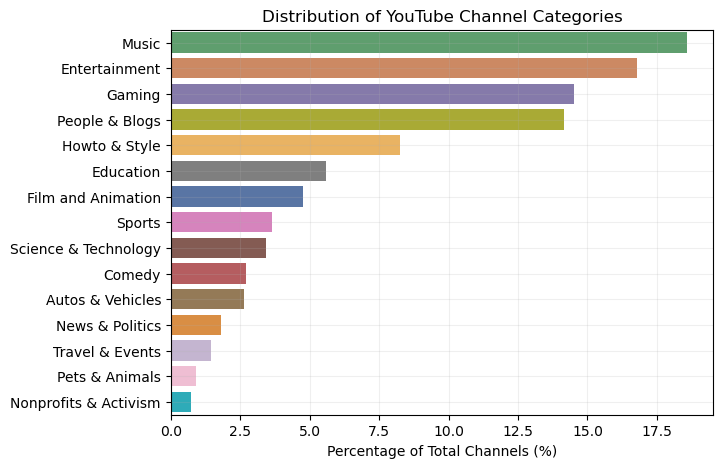

In [43]:

def plot_category_distribution(data, category_colors):

    distribution = data['category_cc'].value_counts(normalize=True).sort_values(ascending=False)*100
    df_dist = distribution.reset_index()
    df_dist.columns = ['category', 'percentage']
    df_dist['color'] = df_dist['category'].map(category_colors)

    plt.figure(figsize=(7, 5))
    sns.barplot(y='category', x='percentage', data=df_dist, palette=df_dist['color'])
    plt.grid(alpha=0.2)
    plt.xlabel('Percentage of Total Channels (%)')
    plt.ylabel('')
    plt.title('Distribution of YouTube Channel Categories')

    plt.show()

plot_category_distribution(channels, category_colors)


In [44]:
def get_cumulative_percentage_top_k(data, k):

    distribution = data['category_cc'].value_counts(normalize=True).sort_values(ascending=False) * 100
    df_dist = distribution.reset_index()
    df_dist.columns = ['category', 'percentage']
    
    cumulative_percentage = df_dist.head(k)['percentage'].sum()
    
    return cumulative_percentage

top_k_cumulative_percentage = get_cumulative_percentage_top_k(channels, k=4)
print(top_k_cumulative_percentage.round(2), '%')

64.05 %


The four categories : **Music, Entertainment, Gaming and People & Blogs** represent **64%** of the total number of youtube channels.

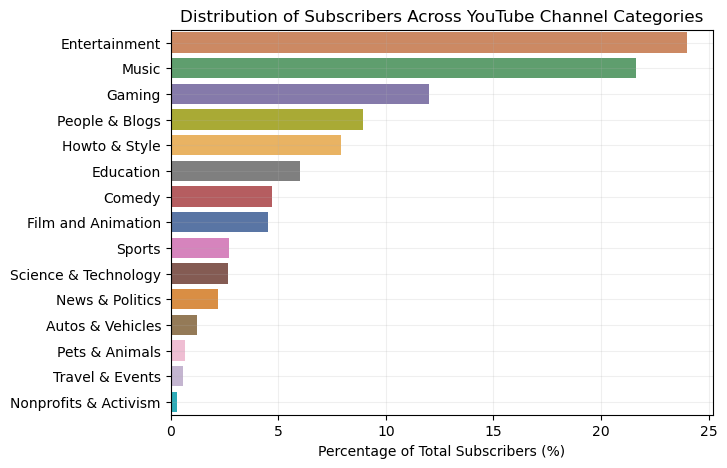

In [46]:

def plot_category_subscribers_distribution(data, category_colors):

    total_number_of_subscribers = channels['subscribers_cc'].sum()
    df_dist = channels.groupby('category_cc')['subscribers_cc'].sum().reset_index().sort_values(ascending=False, by='subscribers_cc')
    df_dist.columns = ['category', 'subscribers']
    df_dist['subscribers'] = 100 * df_dist['subscribers'] / total_number_of_subscribers
    df_dist['color'] = df_dist['category'].map(category_colors)

    plt.figure(figsize=(7, 5))
    sns.barplot(y='category', x='subscribers', data=df_dist, palette=df_dist['color'])

    plt.grid(alpha=0.2)
    plt.xlabel('Percentage of Total Subscribers (%)')
    plt.ylabel('')
    plt.title('Distribution of Subscribers Across YouTube Channel Categories')

    plt.show()

plot_category_subscribers_distribution(channels, category_colors)

In [47]:
def get_cumulative_subscribers_percentage_top_k(data, k):
    total_number_of_subscribers = data['subscribers_cc'].sum()
    df_dist = data.groupby('category_cc')['subscribers_cc'].sum().reset_index().sort_values(ascending=False, by='subscribers_cc')
    df_dist.columns = ['category', 'subscribers']
    df_dist['subscribers'] = 100 * df_dist['subscribers'] / total_number_of_subscribers
    cumulative_percentage = df_dist.head(k)['subscribers'].sum()
    return cumulative_percentage

top_k_cumulative_subscribers_percentage = get_cumulative_subscribers_percentage_top_k(channels, k=4)
print(top_k_cumulative_subscribers_percentage.round(2), '%')

66.55 %


The four same categories : **Music, Entertainment, Gaming and People & Blogs** have **67%** of the total number of subscribers.

In [49]:

# Function that plot the mean or total number of the feature for each category.
# This function can be used for videos_cc, subscribers_cc or views in the time series data set
def plot_feature_by_category(data, feature, category_colors, agg_mode='mean', title=None):

    aggregation_methods = {'mean': 'mean', 'total': 'sum'}
    
    df_dist = data.groupby('category_cc')[feature].agg(aggregation_methods[agg_mode]).reset_index()
    df_dist.columns = ['category', feature]
    df_dist = df_dist.sort_values(ascending=False, by=feature)
    df_dist['color'] = df_dist['category'].map(category_colors)

    plt.figure(figsize=(7, 5))
    sns.barplot(y='category', x=feature, data=df_dist, palette=df_dist['color'])

    if feature == 'videos_cc':
        feature = 'Videos'
    if feature == 'subscribers_cc':
        feature = 'Subscribers'

    if agg_mode == 'mean':
        agg_mode='Average'

    plt.grid(alpha=0.2)
    plt.xlabel(f'{agg_mode.capitalize()} number of {feature}')
    plt.ylabel('')
    plt.title(f'{agg_mode.capitalize()} number of {feature} in each category')

    plt.show()


## Videos

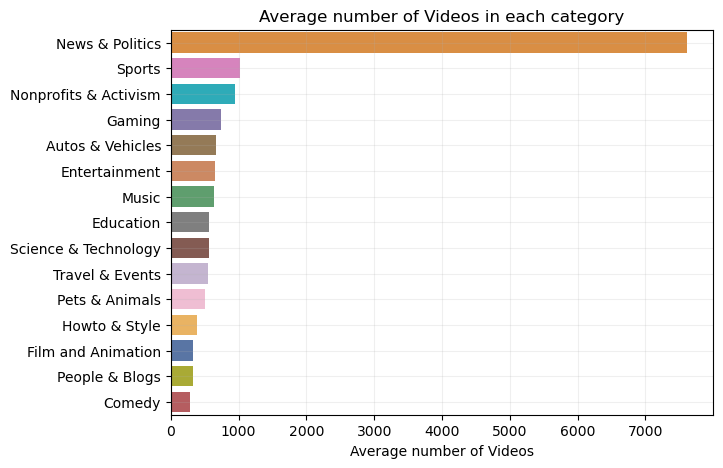

In [51]:
plot_feature_by_category(channels, 'videos_cc', category_colors, agg_mode = 'mean')

News & Politics channels, have by far the highest number of videos by channels. They publish many videos each days to cover what is happening around the world.

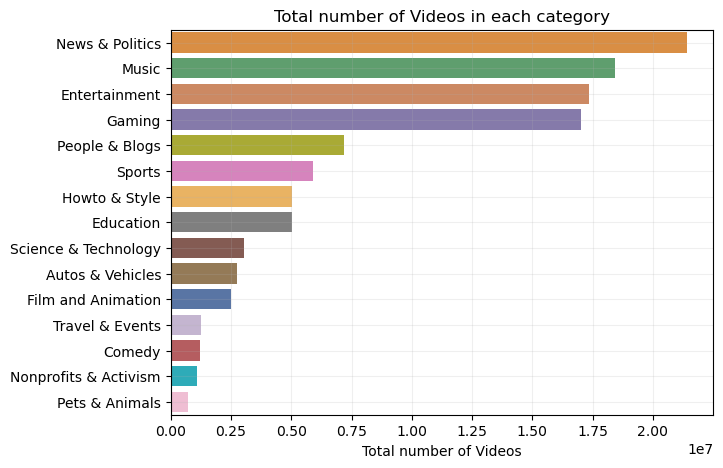

In [53]:
plot_feature_by_category(channels, 'videos_cc', category_colors, agg_mode = 'total')

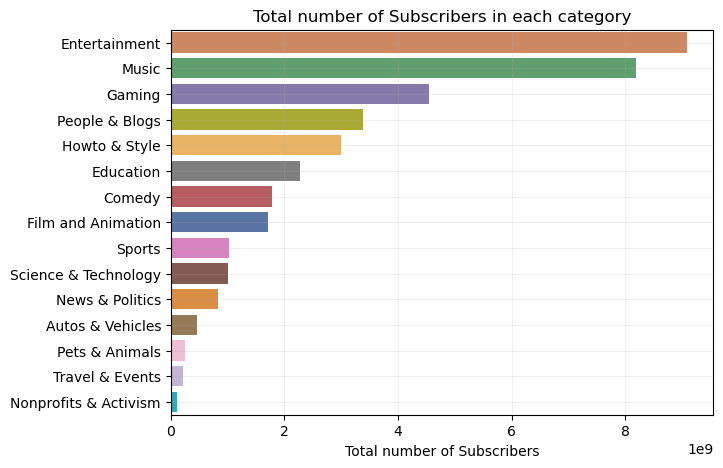

In [133]:
plot_feature_by_category(channels, 'subscribers_cc', category_colors, agg_mode = 'total')

## Youtube Channels creation data

In [55]:
def plot_mean_join_date_by_category(data, category_colors):

    data['float_join_date'] = data['year'] + (data['month'].apply(lambda x:x-1)) * (1/12) + (data['day'].apply(lambda x:x-1)) *  (1/30)
    df_dist = data.groupby('category_cc')['float_join_date'].mean().reset_index()
    df_dist.columns = ['category', 'join_date']
    df_dist = df_dist.sort_values(ascending=False, by='join_date')
    df_dist['color'] = df_dist['category'].map(category_colors)

    plt.figure(figsize=(7, 5))
    sns.barplot(y='category', x='join_date', data=df_dist, palette=df_dist['color'])

    plt.grid(alpha=0.2)
    plt.xlim(2011, 2016)
    plt.xlabel('Average join date')
    plt.ylabel('')
    plt.title('Average join date for each category')

    plt.show()
    

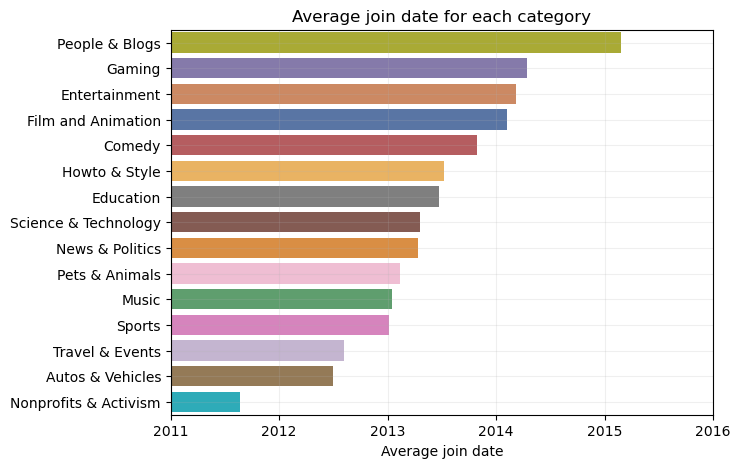

In [56]:
plot_mean_join_date_by_category(channels, category_colors)

 - Evolution creation des chaines

# Time Series DataSet

Thanks to the development of recommandation algorithms, people watch videos that are presented to them on the youtube home page. There are channels with a high number of subscribers but that don't have a lot of views. The number of subscribers is no longer a good indicator of the performance of a channel.

In [59]:
print("Loading data...")
data_path = ".\data"
time_series = pd.read_csv(data_path + '\df_timeseries.tsv', sep='\t')

Loading data...


## Data Cleaning

In [61]:
time_series.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [62]:
col_with_missing_values = [col for col in time_series.columns if time_series[col].isnull().sum() > 0]

print("Columns with missing values :", col_with_missing_values)

Columns with missing values : ['category']


In [63]:
number_of_missing_categories = time_series['category'].isna().sum()
print(f'{ 100 * number_of_missing_categories/len(time_series)} % of categories values are missing')

0.09709725240015055 % of categories values are missing


Less than **0.1%** of channels have unknown category, we can drop them.

In [65]:
cleaned_time_series = time_series[time_series['category'].notna()]

## Data Exploration

In [67]:
time_series = cleaned_time_series

In [131]:

df_channels_vues = time_series.groupby('channel')['delta_views'].sum().reset_index()
df_channels_vues = pd.merge(df_channels_vues, time_series[['channel', 'category']], on='channel')
df_channels_vues.columns = ['channel', 'vues', 'category_cc']


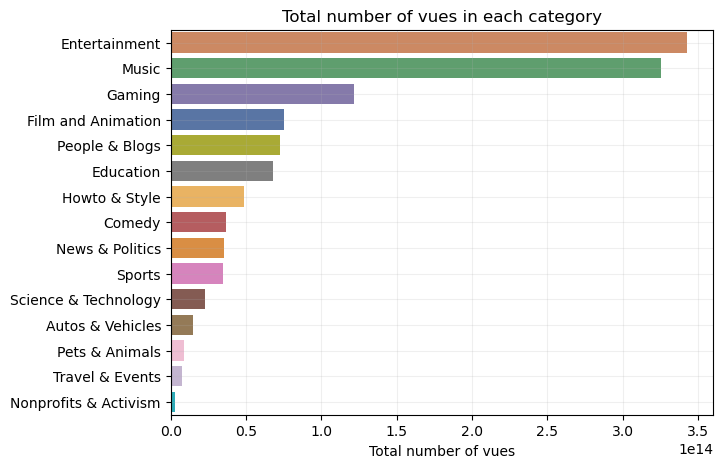

In [70]:
plot_feature_by_category(df_channels_vues, 'vues', category_colors, agg_mode='total')

Plot le graph du nombre moyen de vues par **video** par catégorie.

## Number of views each year

In [72]:
time_series['datetime'] = pd.to_datetime(time_series['datetime'])

time_series['year'] = time_series['datetime'].dt.year
time_series['month'] = time_series['datetime'].dt.month
time_series['day'] = time_series['datetime'].dt.day

time_series['float_date'] = time_series['year'] + time_series['month'].apply(lambda x: (x-1)/12)


In [73]:
from matplotlib.ticker import MaxNLocator
def plot_channel_views_evolution(data, channel):

    data = data[data['channel'] == channel]

    df = data.groupby('float_date')['delta_views'].sum().reset_index()
    df.columns = ['year', 'views']

    plt.figure(figsize=(7, 5))
    sns.set_palette("muted") 
    sns.barplot(x='year', y='views', data=df)

    plt.grid(alpha=0.2)
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
    plt.xlabel('Year')
    plt.ylabel('Total number of views')
    plt.title('Evolution of the Number of Views each Year')

    plt.show()


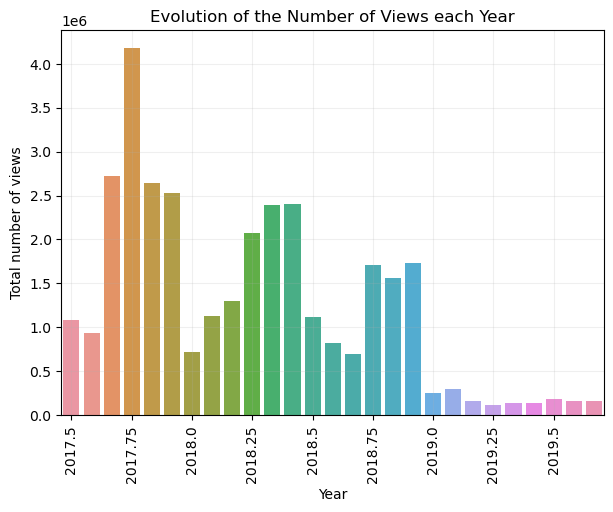

In [74]:
plot_channel_views_evolution(time_series, 'UCBJuEqXfXTdcPSbGO9qqn1g')

Things to add:

-  plot of the evolution of number of views in each category each 'year'.
-  improve the xtick representation : (January 2017, February 2017...)

In [ ]:
-> Ratio abonnés vues, interprétation (par catégorie)
-> Pour chaque catégorie, plot la densité de vues (timeserie)